### Explore the data-files in the repository and familiarize with pandas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Make a map that assigns the total number of memory operations per element to a given algorithm

In [2]:
memops = {'scal':2, 'axpby':3, 'pointwiseDot':6, 'dot':2, 'dx':3, 'dy':3,
         'arakawa':34, 'cg':42}

Now, let's read in one of the csv files (actually they are "whitespace seperated values") and compute the bandwidth from the time measurements, vector size and the memory operations

In [3]:
#read in csv file
df1 = pd.read_csv('benchmark_skl_mpi1.csv', delimiter=' ')
#add size and get rid of non-relevant columns
df1.insert(0,'size', 8*df1['n']*df1['n']*df1['Nx']*df1['Ny']/1e6)
for name, mem in memops.items():
    df1[name] = df1['size']/1000*mem/df1[name]
dfr = df1[['n','Nx','Ny','size']+list(memops.keys())]
dfr

,n,Nx,Ny,size,scal,axpby,pointwiseDot,dot,dx,dy,arakawa,cg
0,2,144,144,0.663552,314.478876,416.429966,524.460662,56.162541,97.585482,39.256309,138.435948,126.542938
1,2,288,288,2.654208,1203.520498,1272.291559,1633.536364,115.879737,183.928301,117.065735,308.217740,227.802475
2,2,384,384,4.718592,1953.722704,2088.414692,1985.410174,137.448463,198.315441,143.189693,367.836204,248.862136
3,2,576,576,10.616832,2892.511146,2698.805765,1293.980788,140.424998,207.967927,189.350724,359.265776,312.356009
4,2,768,768,18.874368,3349.488554,541.433391,595.559361,157.659528,86.322418,106.536537,290.893499,244.174862
...,...,...,...,...,...,...,...,...,...,...,...,...
315,5,576,576,66.355200,1351.859247,361.280581,246.226615,189.578161,126.820840,112.297043,147.858988,161.701097
316,5,768,768,117.964800,457.724662,231.659346,223.125189,185.692383,116.749053,103.895909,139.584366,150.029270
317,5,1152,1152,265.420800,227.990465,218.867049,207.946746,187.211376,123.177679,107.402446,141.847240,118.064374
318,5,1536,1536,471.859200,202.428668,207.751258,205.269221,104.123644,96.821422,78.527590,124.321659,133.102875


We want to aggregate the results with the same input parameters n, Nx, Ny

In [4]:
#compute mean and standard derivation of 'same' groups 
dfr=dfr.groupby(['n', 'Nx','Ny','size']).agg(['mean', 'std'])
dfr=dfr.reset_index(level=['n','Nx','Ny','size'])

In [5]:
#dfr['axpby']

Here, we compute the efficiency of the operations

In [6]:
base_bandwidth = dfr[('axpby','mean')].iloc[15] # base bandwidth at 3 2048 2048 
for name, mem in memops.items():
    dfr[(name,'eff')]= dfr[(name,'mean')]/base_bandwidth
    dfr[(name,'eff_err')]=dfr[(name,'std')]/base_bandwidth
#now display all bandwidth results

In [7]:
cols=[(m,'eff') for m in memops.keys()]
efficiency=dfr[['n','Nx','Ny','size']].join( dfr[cols])
cols=[(m,'eff_err') for m in memops.keys()]
efficiency=efficiency.join( dfr[cols])
#dfr=dfr.sort_values(by='size')
#efficiency=efficiency.set_index('size')

In [8]:
pd.set_option('precision',2)
efficiency=efficiency.sort_values(by='size')
#efficiency.loc[:,'size']
efficiency.iloc[0:20]

,n,Nx,Ny,size,scal,axpby,pointwiseDot,dot,dx,dy,arakawa,cg,scal,axpby,pointwiseDot,dot,dx,dy,arakawa,cg
,,,,,eff,eff,eff,eff,eff,eff,eff,eff,eff_err,eff_err,eff_err,eff_err,eff_err,eff_err,eff_err,eff_err
0,2,144,144,0.66,1.44,2.19,2.88,0.25,0.42,0.20,0.65,0.61,0.03,0.13,0.30,2.10e-02,7.98e-02,8.87e-03,1.38e-02,2.37e-02
8,3,144,144,1.49,3.16,5.03,6.83,0.46,0.84,0.32,0.89,0.80,0.92,0.14,0.18,6.79e-03,4.62e-02,4.47e-03,5.07e-03,5.07e-03
1,2,288,288,2.65,5.53,6.70,7.77,0.57,0.85,0.54,1.42,1.10,0.06,0.46,0.20,2.50e-02,3.30e-02,6.81e-03,1.07e-02,4.95e-02
16,4,144,144,2.65,5.54,6.52,7.69,0.55,0.65,0.33,0.92,0.76,0.09,1.10,0.23,5.95e-02,2.42e-02,1.88e-03,1.11e-02,1.44e-02
24,5,144,144,4.15,7.59,10.87,11.24,0.66,0.63,0.32,0.80,0.74,0.13,0.12,0.18,2.57e-02,2.75e-02,1.67e-03,3.84e-03,5.63e-03
2,2,384,384,4.72,8.84,9.51,9.19,0.69,0.91,0.65,1.68,1.22,0.20,0.27,0.34,3.64e-02,1.66e-02,3.16e-03,1.32e-02,5.82e-02
9,3,288,288,5.97,9.92,10.17,9.73,0.70,0.80,0.55,1.31,1.05,0.15,0.49,0.49,2.35e-02,1.94e-02,3.11e-03,1.32e-02,1.95e-02
3,2,576,576,10.62,12.80,11.92,5.94,0.67,0.94,0.85,1.68,1.45,0.67,0.50,0.97,2.72e-02,2.48e-02,1.43e-02,2.77e-02,2.66e-02
17,4,288,288,10.62,12.91,12.25,6.06,0.68,0.73,0.49,1.07,1.06,0.18,0.42,0.82,4.33e-02,1.08e-02,2.67e-03,1.05e-02,8.21e-02


Let us try and make our first plot

<Figure size 432x288 with 0 Axes>

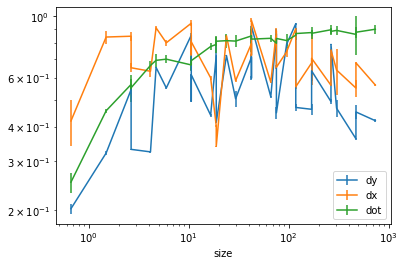

In [9]:
fig=plt.figure()
#print(efficiency)
toPlot=efficiency['dy'].join(efficiency['size'])
ax = toPlot.plot(style='ro',x='size',y='eff',yerr='eff_err')
toPlot=efficiency['dx'].join(efficiency['size'])
ax = toPlot.plot(style='ro',x='size',y='eff',yerr='eff_err',ax=ax)
toPlot=efficiency['dot'].join(efficiency['size'])
ax = toPlot.plot(style='ro',x='size',y='eff',yerr='eff_err',ax=ax)
plt.xscale('log')
plt.yscale('log')
ax.legend(['dy','dx','dot'])

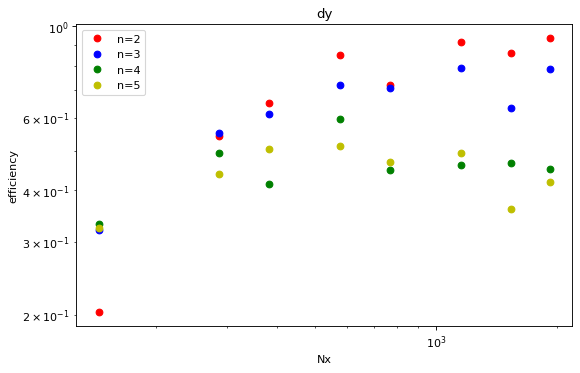

In [10]:
fig,ax=plt.subplots(1,1,figsize=(8,5),dpi= 80, facecolor='w', edgecolor='k')
plotlist = [('dy','eff')]
stylelist = ['ro','bo','go','yo']
#efficiency.iloc[8:24].plot(x=('size',''),y=[('cg','eff'),('arakawa','eff')],style=['ro','bo'],logx=True)
efficiency[efficiency['n']==2].plot(ax=ax, x=('Nx',''),y=plotlist,style=stylelist[0])
efficiency[efficiency['n']==3].plot(ax=ax, x=('Nx',''),y=plotlist,style=stylelist[1])
efficiency[efficiency['n']==4].plot(ax=ax, x=('Nx',''),y=plotlist,style=stylelist[2])
efficiency[efficiency['n']==5].plot(ax=ax, x=('Nx',''),y=plotlist,style=stylelist[3])
#plt.loglog()
plt.title(plotlist[0][0])
plt.xscale('log')
plt.yscale('log')
plt.ylabel('efficiency')
plt.xlabel('Nx')
plt.legend(['n=2','n=3','n=4','n=5'])
plt.show()
#base_bandwidth